In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import cv2
import glob
import numpy as np
data=[]
y=[]
def path_reading(path,k):
  for file in glob.glob(path):
    image_read = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
    images=cv2.resize(image_read,(100,100))
    data.append(images)
    y.append(k)
img_path="/content/drive/MyDrive/gaussian_filtered_images/gaussian_filtered_images/Mild/*.*"
path_reading(img_path,1)

img_path="/content/drive/MyDrive/gaussian_filtered_images/gaussian_filtered_images/No_DR/*.*"
path_reading(img_path,0)

img_path="/content/drive/MyDrive/gaussian_filtered_images/gaussian_filtered_images/Severe/*.*"
path_reading(img_path,1)

img_path="/content/drive/MyDrive/gaussian_filtered_images/gaussian_filtered_images/Moderate/*.*"
path_reading(img_path,1)

data=np.array(data)
y=np.array(y)

print(data,y)

[[[129 128 130 ... 128 128 127]
  [130 129 130 ... 128 128 128]
  [128 129 129 ... 128 129 128]
  ...
  [126 126 126 ... 127 127 127]
  [128 128 128 ... 128 128 127]
  [126 128 128 ... 128 128 129]]

 [[128 128 128 ... 128 128 128]
  [128 128 130 ... 128 128 127]
  [128 128 130 ... 128 128 127]
  ...
  [127 129 129 ... 128 128 128]
  [127 128 129 ... 128 127 128]
  [128 128 128 ... 126 127 128]]

 [[128 129 129 ... 129 129 129]
  [127 130 128 ... 131 129 126]
  [130 131 128 ... 129 132 127]
  ...
  [127 128 127 ... 128 133 129]
  [127 129 131 ... 130 128 126]
  [128 128 127 ... 127 128 127]]

 ...

 [[128 128 128 ... 128 128 128]
  [128 128 128 ... 128 128 128]
  [128 128 128 ... 128 128 128]
  ...
  [128 128 128 ... 128 129 128]
  [128 128 128 ... 129 128 128]
  [128 128 128 ... 128 128 128]]

 [[129 129 127 ... 128 127 125]
  [129 127 126 ... 126 128 128]
  [129 127 126 ... 126 128 130]
  ...
  [128 128 128 ... 128 128 128]
  [129 131 126 ... 130 128 128]
  [127 128 127 ... 128 132 1

In [30]:
print(data.shape)
print(y.shape)

(3375, 100, 100)
(3375,)


In [31]:
nsamples, nx, ny = data.shape
x = data.reshape((nsamples,nx*ny))
print(x.shape)

(3375, 10000)


In [32]:
from sklearn.utils import shuffle
x,y=shuffle(x,y)

In [33]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.25, random_state = 0)

In [34]:

#normalizing(to transform features to be o a similar scale) the data-standardscaler
# standardscaler it helps converting all numerical values into the one range
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)#normalizing
xtest = sc_x.transform(xtest)

**Logistic Regression**

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)

In [36]:
model.fit(xtrain, ytrain)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [37]:
y_pred = model.predict(xtest)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Confusion Matrix : 
 [[418  29]
 [ 35 362]]
Accuracy :  0.9241706161137441


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       447
           1       0.93      0.91      0.92       397

    accuracy                           0.92       844
   macro avg       0.92      0.92      0.92       844
weighted avg       0.92      0.92      0.92       844



**KNN**

In [40]:
from sklearn.neighbors import KNeighborsClassifier
 
knn = KNeighborsClassifier(n_neighbors = 1)
 
knn.fit(xtrain, ytrain)
pred = knn.predict(xtest)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
print ("Accuracy : ", accuracy_score(ytest,pred))
print(confusion_matrix(ytest, pred))
print(classification_report(ytest, pred))

Accuracy :  0.9063981042654028
[[404  43]
 [ 36 361]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       447
           1       0.89      0.91      0.90       397

    accuracy                           0.91       844
   macro avg       0.91      0.91      0.91       844
weighted avg       0.91      0.91      0.91       844



**Desicion Tree**

In [42]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
15
clf_tree.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=4, random_state=1)

[Text(0.5, 0.9, 'x[428] <= 0.476\ngini = 0.497\nsamples = 2531\nvalue = [1358, 1173]'),
 Text(0.25, 0.7, 'x[9966] <= -0.044\ngini = 0.166\nsamples = 1201\nvalue = [1091, 110]'),
 Text(0.125, 0.5, 'x[9765] <= -0.711\ngini = 0.102\nsamples = 1129\nvalue = [1068, 61]'),
 Text(0.0625, 0.3, 'x[8784] <= 0.156\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.03125, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.09375, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.1875, 0.3, 'x[1273] <= -3.946\ngini = 0.087\nsamples = 1118\nvalue = [1067, 51]'),
 Text(0.15625, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.21875, 0.1, 'gini = 0.082\nsamples = 1115\nvalue = [1067, 48]'),
 Text(0.375, 0.5, 'x[587] <= -0.559\ngini = 0.435\nsamples = 72\nvalue = [23, 49]'),
 Text(0.3125, 0.3, 'x[9181] <= 0.337\ngini = 0.386\nsamples = 23\nvalue = [17, 6]'),
 Text(0.28125, 0.1, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.34375, 0.1, 'gini = 0.0\nsamples = 16\nvalue 

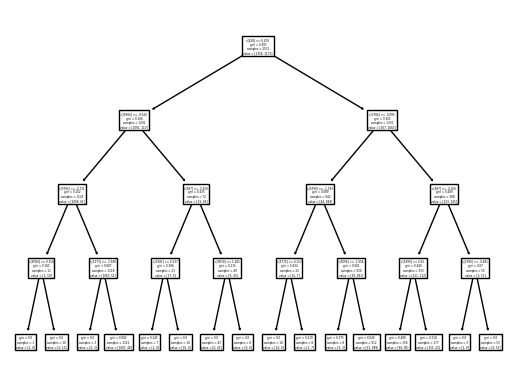

In [45]:
from sklearn import tree
tree.plot_tree(clf_tree)

In [46]:
pre=clf_tree.predict(xtest)

In [47]:
pre

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

In [48]:
print ("Accuracy : ", accuracy_score(ytest,pre))
print(confusion_matrix(ytest, pre))
print(classification_report(ytest, pre))

Accuracy :  0.8992890995260664
[[404  43]
 [ 42 355]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       447
           1       0.89      0.89      0.89       397

    accuracy                           0.90       844
   macro avg       0.90      0.90      0.90       844
weighted avg       0.90      0.90      0.90       844



**Support Vector Machine**

In [49]:
from sklearn.svm import SVC
cl = SVC(kernel='linear', probability=True, random_state=42)
cl.fit(xtrain, ytrain)

SVC(kernel='linear', probability=True, random_state=42)

In [50]:
p=cl.predict(xtest)

In [51]:
print ("Accuracy : ", accuracy_score(ytest,p))
print(confusion_matrix(ytest, p))
print(classification_report(ytest, p))

Accuracy :  0.9206161137440758
[[414  33]
 [ 34 363]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       447
           1       0.92      0.91      0.92       397

    accuracy                           0.92       844
   macro avg       0.92      0.92      0.92       844
weighted avg       0.92      0.92      0.92       844



**Random Forest**

In [52]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier()
regressor.fit(xtrain, ytrain)

RandomForestClassifier()

In [53]:
dn=regressor.predict(xtest)

In [54]:
dn

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

In [55]:
print ("Accuracy : ", accuracy_score(ytest,dn))
print(confusion_matrix(ytest, dn))
print(classification_report(ytest, dn))

Accuracy :  0.9241706161137441
[[420  27]
 [ 37 360]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       447
           1       0.93      0.91      0.92       397

    accuracy                           0.92       844
   macro avg       0.92      0.92      0.92       844
weighted avg       0.92      0.92      0.92       844



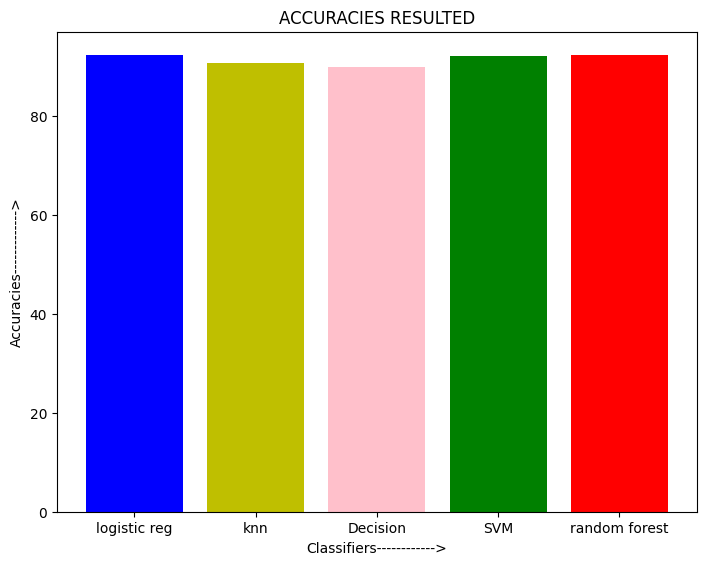

In [56]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

algo = ['logistic reg','knn','Decision','SVM','random forest']

accuracy = [accuracy_score(ytest, y_pred)*100,accuracy_score(ytest,pred)*100,accuracy_score(ytest,pre)*100,accuracy_score(ytest,p)*100,accuracy_score(ytest,dn)*100]

ax.bar(algo[0],accuracy[0],color = 'b')

ax.bar(algo[1],accuracy[1],color = 'y')

ax.bar(algo[2],accuracy[2],color = 'pink')


ax.bar(algo[3],accuracy[3],color = 'green')

ax.bar(algo[4],accuracy[4],color = 'r')

plt.xlabel('Classifiers------------>')

plt.ylabel('Accuracies------------->')

plt.title('ACCURACIES RESULTED')

plt.show()